In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

In [66]:
Nx = 50
Nt = 1000
x = np.linspace(0.,4.,Nx)
t = np.linspace(0.,4.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

v = 5.
lambda_ = v*dt/dx
print(lambda_)

0.24524524524524527


In [67]:
def ui(x):
    #return 0.
    return np.sin(np.pi*x)
   # return -x/4

In [68]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    u[0,:] = ui(x)
    
    return u

In [69]:
u = InitT()

In [70]:
def h1(t):
    return 0
def h2(t):
    return 0.5*np.cos(5*np.pi*t)

Termino de absorcion:

$$ -\gamma \frac{du}{dt} $$ 

In [75]:
def GetSolution():
    
    gamma = 2*dt
    
    for l in tqdm(range(1,len(t))):
        
        if l==1:
            u[l,:] = u[l-1,:]
        else:
            
            
            for i in range(1,len(x)-1):
                u[l,i] = 2*(1-lambda_**2)*u[l-1,i] + \
                lambda_**2*(u[l-1,i+1] + u[l-1,i-1]) - \
                u[l-2,i] \
                - gamma*u[l-1,i] + gamma*u[l-2,i]

In [76]:
GetSolution()

100%|█████████████████████████████████████████████████| 999/999 [00:00<00:00, 4718.19it/s]


In [77]:
u[0,:]

array([ 0.00000000e+00,  2.53654584e-01,  4.90717552e-01,  6.95682551e-01,
        8.55142763e-01,  9.58667853e-01,  9.99486216e-01,  9.74927912e-01,
        8.86599306e-01,  7.40277997e-01,  5.45534901e-01,  3.15108218e-01,
        6.40702200e-02, -1.91158629e-01, -4.33883739e-01, -6.48228395e-01,
       -8.20172255e-01, -9.38468422e-01, -9.95379113e-01, -9.87181783e-01,
       -9.14412623e-01, -7.81831482e-01, -5.98110530e-01, -3.75267005e-01,
       -1.27877162e-01,  1.27877162e-01,  3.75267005e-01,  5.98110530e-01,
        7.81831482e-01,  9.14412623e-01,  9.87181783e-01,  9.95379113e-01,
        9.38468422e-01,  8.20172255e-01,  6.48228395e-01,  4.33883739e-01,
        1.91158629e-01, -6.40702200e-02, -3.15108218e-01, -5.45534901e-01,
       -7.40277997e-01, -8.86599306e-01, -9.74927912e-01, -9.99486216e-01,
       -9.58667853e-01, -8.55142763e-01, -6.95682551e-01, -4.90717552e-01,
       -2.53654584e-01, -4.89858720e-16])

<IPython.core.display.Javascript object>


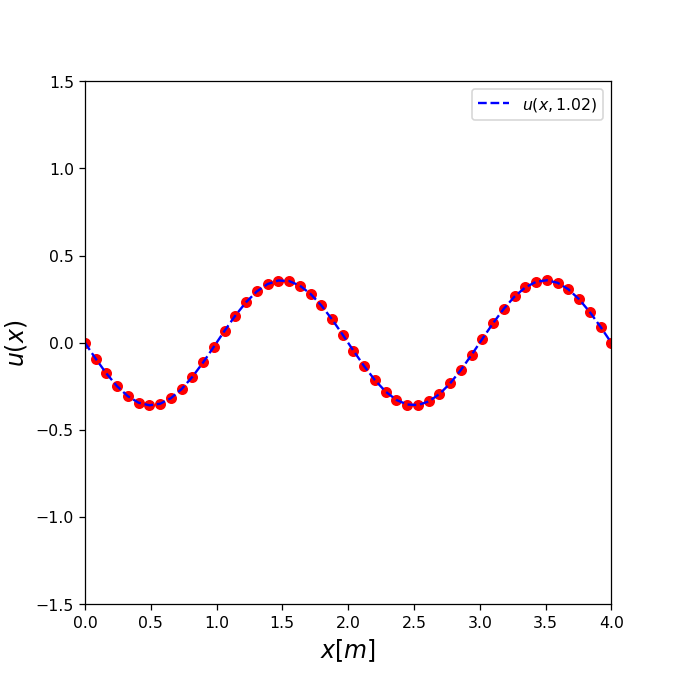

In [78]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1.5,1.5)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)

In [31]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me') )
#Animation.save( 'Onda1D.mp4', writer=writer )